In [ ]:
library(dplyr)
library(tidyr)
library(purrr)
library(pheatmap)
library(ggplot2)
library(reshape2)
library(factoextra)

In [ ]:
#########对所有AS事件进行分类（按照其跟随发育时间的变化程度）
#PSI > 0.9 (all times)(no change)
#max(PSI) - min(PSI) < 0.1 (stable)
#max(PSI) - min(PSI) >=0.1 and Cor(X,L) > 0.7 (continous up)
#max(PSI) - min(PSI) >=0.1 and Cor(X,L) < -0.7 (continous down)


In [3]:
###for up res
psi_matrix <- read.table("/disk1/wenqing/tmp_data/PFC_s2/salmon_output_untrimmed_ver/project_events_untrimmed_ver.psi")
head(psi_matrix)

,GW08,GW12,GW16_1_3,GW16_1_4,GW16_1_9,GW19_1_1,GW19_1_2,GW19_1_3,GW23_1_1,GW23_1_2,GW23_1_3,GW26_1_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15;A5:chrX:100635746-100636191:100635746-100636608:-,0,0,NaN,0,0.0000000,0,0,0,0,0.0000000,0,0
ENSG00000000003.15;A5:chrX:100635746-100636608:100635746-100636793:-,1,1,0,1,1.0000000,1,1,1,1,1.0000000,1,1
ENSG00000000003.15;AF:chrX:100635746-100636191:100636689:100635746-100636793:100637104:-,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000003.15;SE:chrX:100630866-100632485:100632568-100633405:-,1,1,0,1,1.0000000,1,1,1,1,1.0000000,1,1
ENSG00000000419.13;A3:chr20:50940955-50941105:50940933-50941105:-,1,1,1,1,NaN,1,1,NaN,1,0.9876185,1,1
ENSG00000000419.13;A3:chr20:50940955-50942031:50940933-50942031:-,0,NaN,0,0,0.5916562,0,0,0,0,NaN,NaN,0


In [47]:
region_has_up_res <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/allType_region_has_up.txt")[,1]
length(region_has_up_res)
sub_psi_mtx_up_res <- psi_matrix[region_has_up_res,]
sub_psi_mtx_up_res[is.na(sub_psi_mtx_up_res)] <- 0
sub_psi_mtx_up_res <- sub_psi_mtx_up_res[rowSums(sub_psi_mtx_up_res)!=0,]
dim(sub_psi_mtx_up_res)
df <- sub_psi_mtx_up_res %>%
  rowwise() %>%
  mutate(diff_PSI = max(c_across(starts_with("GW"))) - min(c_across(starts_with("GW"))))
df <- as.data.frame(df)
rownames(df) <- rownames(sub_psi_mtx_up_res)
# 生成L序列，L代表时间点的均匀分布，从1到n（n为列数）
L_sequence <- seq(0,1,length.out=ncol(sub_psi_mtx_up_res))

# 定义一个函数来计算单行的X与L的相关性
calc_correlation <- function(row) {
  cor(row, L_sequence, method = "pearson")
}

cor_value <- apply(sub_psi_mtx_up_res,1,calc_correlation)
psi_no_change <- function(row){
  pass_flag_num <- length(which(row > 0.9))
  if(pass_flag_num > 0.8*12){
    return(1)
  }
  else{
    return(0)
  }
}
no_change_index <- apply(sub_psi_mtx_up_res,1,psi_no_change)
cor_value[is.na(cor_value)] <- 0
df$cor_value <- cor_value
df$change_index <- no_change_index
#change_index=1:没有变换，=0:有变化
#quantile(df$cor_value[which(df$cor_value>=0)])
# 使用quantile函数直接找到10%分位点的值
quantile_10_percent_above0 <- quantile(df$cor_value[df$cor_value >= 0], 0.7)
quantile_10_percent_below0 <- quantile(df$cor_value[df$cor_value <= 0], 0.3)
table(df$cor_value > quantile_10_percent_above0)
table(df$cor_value < quantile_10_percent_below0)
quantile_10_percent_above0
quantile_10_percent_below0
##psi没变化的event
no_change_event <- df[which(df$change_index == 1),]
stable_event <- df[which(df$diff_PSI < 0.1),]
up_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value > quantile_10_percent_above0),]
down_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value < quantile_10_percent_below0),]
dim(up_event)
dim(down_event)
dim(stable_event)
dim(no_change_event)

write.table(up_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/up_res_related_psi/psi_up_events.txt",quote=F,sep='\t',col.names=F)
write.table(down_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/up_res_related_psi/psi_down_events.txt",quote=F,sep='\t',col.names=F)
write.table(stable_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/up_res_related_psi/psi_stable_events.txt",quote=F,sep='\t',col.names=F)
write.table(no_change_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/up_res_related_psi/psi_no_change_events.txt",quote=F,sep='\t',col.names=F)
region_has_down_res <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/allType_region_has_down.txt")[,1]
length(region_has_down_res)
sub_psi_mtx_down_res <- psi_matrix[region_has_down_res,]
sub_psi_mtx_down_res[is.na(sub_psi_mtx_down_res)] <- 0
sub_psi_mtx_down_res <- sub_psi_mtx_down_res[rowSums(sub_psi_mtx_down_res)!=0,]
dim(sub_psi_mtx_down_res)
df <- sub_psi_mtx_down_res %>%
  rowwise() %>%
  mutate(diff_PSI = max(c_across(starts_with("GW"))) - min(c_across(starts_with("GW"))))
df <- as.data.frame(df)
rownames(df) <- rownames(sub_psi_mtx_down_res)
# 生成L序列，L代表时间点的均匀分布，从1到n（n为列数）
L_sequence <- seq(0,1,length.out=ncol(sub_psi_mtx_down_res))

# 定义一个函数来计算单行的X与L的相关性
calc_correlation <- function(row) {
  cor(row, L_sequence, method = "pearson")
}

cor_value <- apply(sub_psi_mtx_down_res,1,calc_correlation)
psi_no_change <- function(row){
  pass_flag_num <- length(which(row > 0.9))
  if(pass_flag_num > 0.8*12){
    return(1)
  }
  else{
    return(0)
  }
}
no_change_index <- apply(sub_psi_mtx_down_res,1,psi_no_change)
cor_value[is.na(cor_value)] <- 0
df$cor_value <- cor_value
df$change_index <- no_change_index
#change_index=1:没有变换，=0:有变化
#quantile(df$cor_value[which(df$cor_value>=0)])
# 使用quantile函数直接找到10%分位点的值
quantile_10_percent_above0 <- quantile(df$cor_value[df$cor_value >= 0], 0.7)
quantile_10_percent_below0 <- quantile(df$cor_value[df$cor_value <= 0], 0.3)
table(df$cor_value > quantile_10_percent_above0)
table(df$cor_value < quantile_10_percent_below0)
quantile_10_percent_above0
quantile_10_percent_below0
##psi没变化的event
no_change_event <- df[which(df$change_index == 1),]
stable_event <- df[which(df$diff_PSI < 0.1),]
up_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value > quantile_10_percent_above0),]
down_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value < quantile_10_percent_below0),]
dim(up_event)
dim(down_event)
dim(stable_event)
dim(no_change_event)

write.table(up_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/down_res_related_psi/psi_up_events.txt",quote=F,sep='\t',col.names=F)
write.table(down_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/down_res_related_psi/psi_down_events.txt",quote=F,sep='\t',col.names=F)
write.table(stable_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/down_res_related_psi/psi_stable_events.txt",quote=F,sep='\t',col.names=F)
write.table(no_change_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/down_res_related_psi/psi_no_change_events.txt",quote=F,sep='\t',col.names=F)
region_has_stable_res <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/psi_matrix/allType_region_has_stable.txt")[,1]
length(region_has_stable_res)
sub_psi_mtx_stable_res <- psi_matrix[region_has_stable_res,]
sub_psi_mtx_stable_res[is.na(sub_psi_mtx_stable_res)] <- 0
sub_psi_mtx_stable_res <- sub_psi_mtx_stable_res[rowSums(sub_psi_mtx_stable_res)!=0,]
dim(sub_psi_mtx_stable_res)
df <- sub_psi_mtx_stable_res %>%
  rowwise() %>%
  mutate(diff_PSI = max(c_across(starts_with("GW"))) - min(c_across(starts_with("GW"))))
df <- as.data.frame(df)
rownames(df) <- rownames(sub_psi_mtx_stable_res)
# 生成L序列，L代表时间点的均匀分布，从1到n（n为列数）
L_sequence <- seq(0,1,length.out=ncol(sub_psi_mtx_stable_res))

# 定义一个函数来计算单行的X与L的相关性
calc_correlation <- function(row) {
  cor(row, L_sequence, method = "pearson")
}

cor_value <- apply(sub_psi_mtx_stable_res,1,calc_correlation)
psi_no_change <- function(row){
  pass_flag_num <- length(which(row > 0.9))
  if(pass_flag_num > 0.8*12){
    return(1)
  }
  else{
    return(0)
  }
}
no_change_index <- apply(sub_psi_mtx_stable_res,1,psi_no_change)
cor_value[is.na(cor_value)] <- 0
df$cor_value <- cor_value
df$change_index <- no_change_index
#change_index=1:没有变换，=0:有变化
#quantile(df$cor_value[which(df$cor_value>=0)])
# 使用quantile函数直接找到10%分位点的值
quantile_10_percent_above0 <- quantile(df$cor_value[df$cor_value >= 0], 0.7)
quantile_10_percent_below0 <- quantile(df$cor_value[df$cor_value <= 0], 0.3)
table(df$cor_value > quantile_10_percent_above0)
table(df$cor_value < quantile_10_percent_below0)
quantile_10_percent_above0
quantile_10_percent_below0
##psi没变化的event
no_change_event <- df[which(df$change_index == 1),]
stable_event <- df[which(df$diff_PSI < 0.1),]
up_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value > quantile_10_percent_above0),]
down_event <- df[which(df$diff_PSI >= 0.1 & df$cor_value < quantile_10_percent_below0),]
dim(up_event)
dim(down_event)
dim(stable_event)
dim(no_change_event)

write.table(up_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/stable_res_related_psi/psi_up_events.txt",quote=F,sep='\t',col.names=F)
write.table(down_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/stable_res_related_psi/psi_down_events.txt",quote=F,sep='\t',col.names=F)
write.table(stable_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/stable_res_related_psi/psi_stable_events.txt",quote=F,sep='\t',col.names=F)
write.table(no_change_event,"~/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/stable_res_related_psi/psi_no_change_events.txt",quote=F,sep='\t',col.names=F)

[1] 3715

[1] 1145   12

Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):


FALSE  TRUE 
  910   235 


FALSE  TRUE 
 1038   107 

70% 
0.4162052

30% 
-0.3056992

[1] 226  15

[1] 101  15

[1] 74 15

[1] 138  15

[1] 907

[1] 305  12

Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”



FALSE  TRUE 
  251    54 


FALSE  TRUE 
  278    27 

70% 
0.3930418

30% 
-0.3056992

[1] 51 15

[1] 26 15

[1] 19 15

[1] 52 15

[1] 689

[1] 249  12

Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):
“the standard deviation is zero”
Warning message in cor(row, L_sequence, method = "pearson"):


FALSE  TRUE 
  195    54 


FALSE  TRUE 
  226    23 

70% 
0.3930418

30% 
-0.2823997

[1] 52 15

[1] 19 15

[1] 25 15

[1] 45 15

In [48]:
#######不同的cor值，res数量不同，iri fc和expr fc的cor结果也不同
as_events_num <- c(226,101,74,138,51,26,19,52,52,19,25,45)
res_group <- rep(c('res_up','res_down','res_stable'),each=4)
psi_group <- rep(c('psi_up','psi_down','psi_stable','psi_no_change'),3)

dat <- as.data.frame(cbind(as_events_num,res_group,psi_group))
dat$as_events_num <- as.numeric(dat$as_events_num)

# 将psi_group列转换为因子，并设定其水平顺序
dat$psi_group <- factor(dat$psi_group, levels = c('psi_up','psi_down','psi_stable','psi_no_change'))
dat$res_group <- factor(dat$res_group, levels = c('res_up','res_down','res_stable'))

In [49]:
sum(as_events_num)

[1] 828

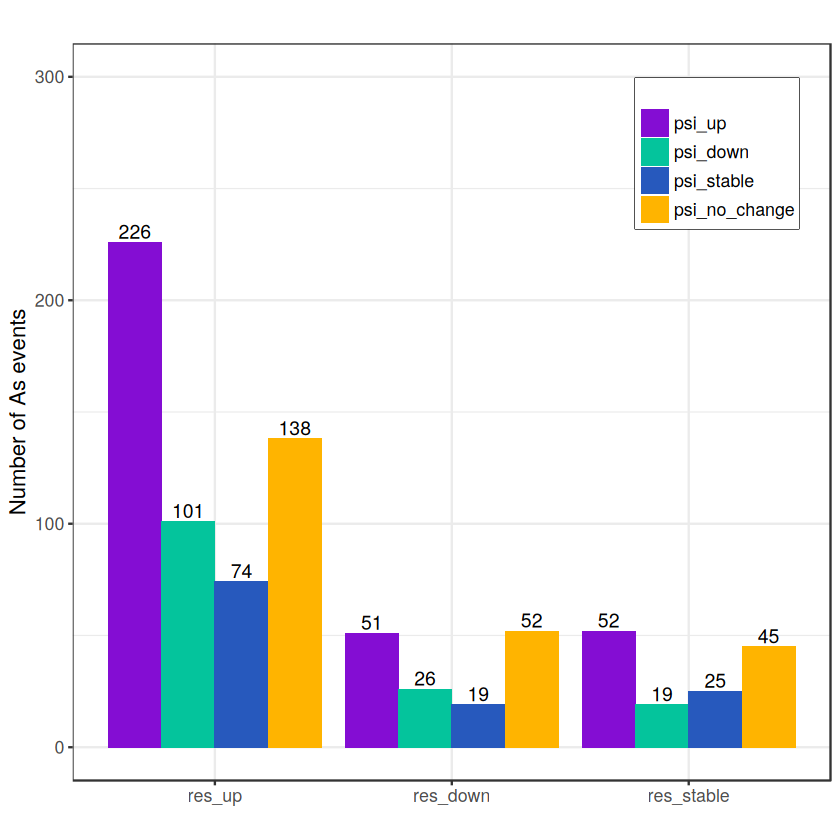

In [52]:
colors=c("#840dd3","#04c49c","#2759bd","#FFB400")
# 使用ggplot2绘制分组柱状图，加入颜色指定
ggplot(dat, aes(x = res_group, y = as_events_num, fill = psi_group)) +
  geom_bar(stat = "identity", position = "dodge") +
  ylim(0,300) +
  scale_fill_manual(values = colors) + # 指定颜色
  #facet_wrap(~ cell_type, ncol = 1, scales = "free_x") +
  labs(title = "",
       x = "", y = "Number of As events", fill = "") +
  theme_bw() +
  theme(text = element_text(size = 13),
        legend.position = c(0.85,0.85),
        legend.box.background = element_rect(color = "black", size = 0.5),
        legend.spacing.x = unit(1, "mm"),     # 调整水平间距
        legend.spacing.y = unit(1, "mm"),    # 调整垂直间距
        legend.margin = margin(3, 3, 3, 3)
  ) +
  guides(fill = guide_legend(reverse = F)) +
  geom_text(aes(label = as_events_num), 
            position = position_dodge(width = 0.9), # 调整分组条形图中标签的位置
            vjust = -0.25, # 上下微调文本位置，负值向上，正值向下
            size = 4)


################对这些as事件的psi matrix进行PCA分析
#将3组res中的所有stable、down、up、no_change psi事件合并成一个matrix,并在每一个事件的后面添加res group和psi change group
cd ./up_res_related_psi
paste <(awk '{if($1!="GW08") print $0}' psi_up_events.txt) <(yes "res_up" | head -n 226) <(yes "psi_up" | head -n 226) > psi_up_events_wzGRP.txt
paste <(awk '{if($1!="GW08") print $0}' psi_down_events.txt) <(yes "res_up" | head -n 101) <(yes "psi_down" | head -n 101) > psi_down_events_wzGRP.txt
paste <(awk '{if($1!="GW08") print $0}' psi_stable_events.txt) <(yes "res_up" | head -n 74) <(yes "psi_stable" | head -n 74) > psi_stable_events_wzGRP.txt
paste <(awk '{if($1!="GW08") print $0}' psi_no_change_events.txt) <(yes "res_up" | head -n 138) <(yes "psi_no_change" | head -n 138) > psi_no_change_events_wzGRP.txt
#........
cat ./up_res_related_psi/*wz* ./down_res_related_psi/*wz* ./stable_res_related_psi/*wz* > ./all_res_group_all_psi_events.txt


In [59]:
input_data <- read.table("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/all_res_group_all_psi_events.txt")
#head(input_data)
# 处理重复名字，谨慎处理，先找到名字重复的原因再决定是否需要按一下方式都保留
uniq_input_data <- input_data[!duplicated(input_data[,1]),]
rownames(uniq_input_data) <- uniq_input_data[,1]
uniq_input_data <- uniq_input_data[,-1]
#head(uniq_input_data)
pca_input_mtx_wz_grp <- uniq_input_data[,c(1:12,16,17)]
pca_input_mtx <- uniq_input_data[,c(1:12)]
#head(pca_input_mtx)
dim(pca_input_mtx)
#pca_input_mtx <- pca_input_mtx[rowSums(pca_input_mtx)>0,]
#dim(pca_input_mtx)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
ENSG00000088367.23;MX:chr20:36092813-36112426:36112480-36175551:36092813-36173764:36173954-36175551:+,1.0000000,1.000000000,1.00000000,1.00000000,1.00000000,1.00000000,1.000000000,0.00000000,1.0000000,1.00000000,0.00000000,1.0000000,1.0000000,-0.3886502,1,res_up,psi_down
ENSG00000100325.15;MX:chr22:29832342-29834442:29834550-29838178:29832342-29836438:29836500-29838178:-,0.0000000,1.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,1.0000000,-0.3930418,0,res_up,psi_down
ENSG00000163630.11;MX:chr3:63278742-63480832:63480956-63609125:63278742-63556543:63556741-63609125:+,1.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,1.0000000,-0.4803845,0,res_up,psi_down
ENSG00000129071.10;A5:chr3:129434136-129436443:129434136-129436461:-,0.0000000,1.000000000,0.00000000,0.00000000,0.00000000,0.97250202,0.000000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,1.0000000,-0.3274490,0,res_up,psi_down
ENSG00000167642.13;A5:chr19:38264998-38283627:38264723-38283627:+,1.0000000,1.000000000,1.00000000,1.00000000,1.00000000,1.00000000,1.000000000,1.00000000,1.0000000,1.00000000,0.00000000,1.0000000,1.0000000,-0.3930418,1,res_up,psi_down
ENSG00000179915.24;A3:chr2:50925955-51027502:50925952-51027502:-,0.1651532,0.004231252,0.04123618,0.02373961,0.09668841,0.01977035,0.006160147,0.03074605,0.0274772,0.02737971,0.01563169,0.0642028,0.1609219,-0.3546166,0,res_up,psi_down


In [61]:
# 去掉方差为0 的行，这些本身没有意义，也妨碍后续运算
pca_input_mtx <- pca_input_mtx[apply(pca_input_mtx, 1, var)!=0,]
pca_input_mtx_wz_grp <- pca_input_mtx_wz_grp[rownames(pca_input_mtx),]
dim(pca_input_mtx)
dim(pca_input_mtx_wz_grp)
#table(apply(pca_input_mtx, 1, var)==0)
#FALSE  TRUE 
# 1188   108 

[1] 550  12

[1] 550  14

In [62]:
# Pay attention to the format of PCA input 
# Rows are samples and columns are variables
data_t <- t(pca_input_mtx)
#head(aes_params = list(label = ""))
rownames(data_t) <- colnames(psi_matrix)
variableL <- ncol(data_t)
#data_t$res_group <- pca_input_mtx_wz_grp[,13]
#data_t$psi_group <- pca_input_mtx_wz_grp[,14]
#fviz_pca_ind(pca, col.ind=data_t$conditions, mean.point=F, addEllipses = T, legend.title="Groups", ellipse.type="confidence", ellipse.level=0.95)


In [63]:
dim(data_t)

[1]  12 550

In [64]:
pca <- prcomp(data_t[,1:variableL], scale=T)

# sdev: standard deviation of the principle components.
# Square to get variance
# percentVar <- pca$sdev^2 / sum( pca$sdev^2)

# To check what's in pca
print(str(pca))

List of 5
 $ sdev    : num [1:12] 12.45 9.8 7.68 7.2 6.1 ...
 $ rotation: num [1:550, 1:12] 3.63e-05 -1.58e-02 -3.25e-02 -1.42e-02 -1.04e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:550] "ENSG00000088367.23;MX:chr20:36092813-36112426:36112480-36175551:36092813-36173764:36173954-36175551:+" "ENSG00000100325.15;MX:chr22:29832342-29834442:29834550-29838178:29832342-29836438:29836500-29838178:-" "ENSG00000163630.11;MX:chr3:63278742-63480832:63480956-63609125:63278742-63556543:63556741-63609125:+" "ENSG00000129071.10;A5:chr3:129434136-129436443:129434136-129436461:-" ...
  .. ..$ : chr [1:12] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:550] 0.8333 0.0833 0.0833 0.1644 0.9167 ...
  ..- attr(*, "names")= chr [1:550] "ENSG00000088367.23;MX:chr20:36092813-36112426:36112480-36175551:36092813-36173764:36173954-36175551:+" "ENSG00000100325.15;MX:chr22:29832342-29834442:29834550-29838178:29832342-29836438:29836500-29838178:-" "ENSG00000163630.11;MX:chr3:63278742-63480832:

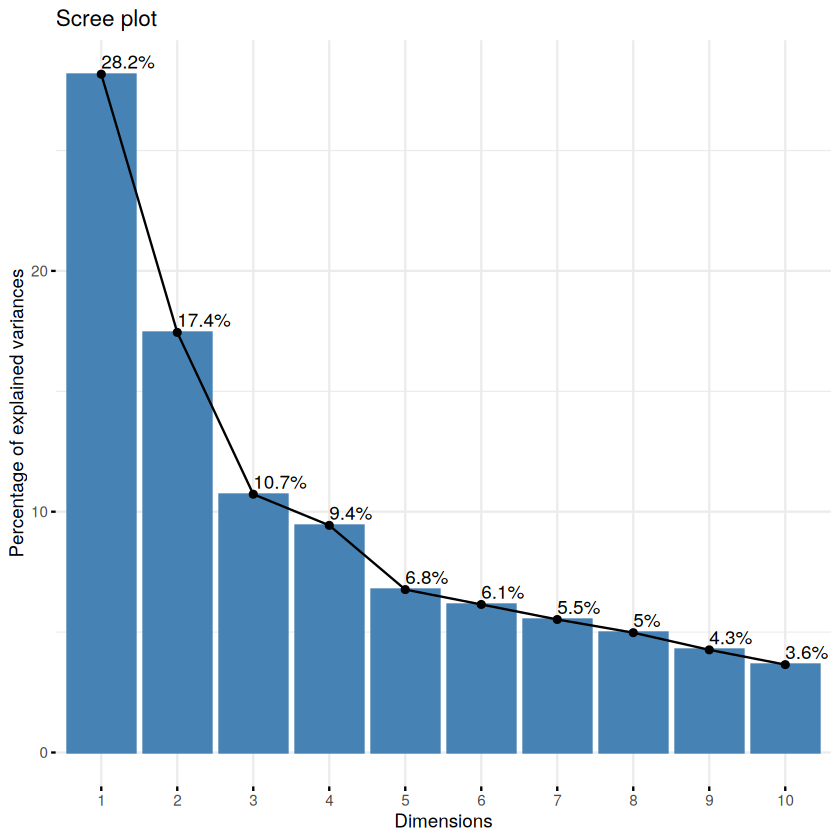

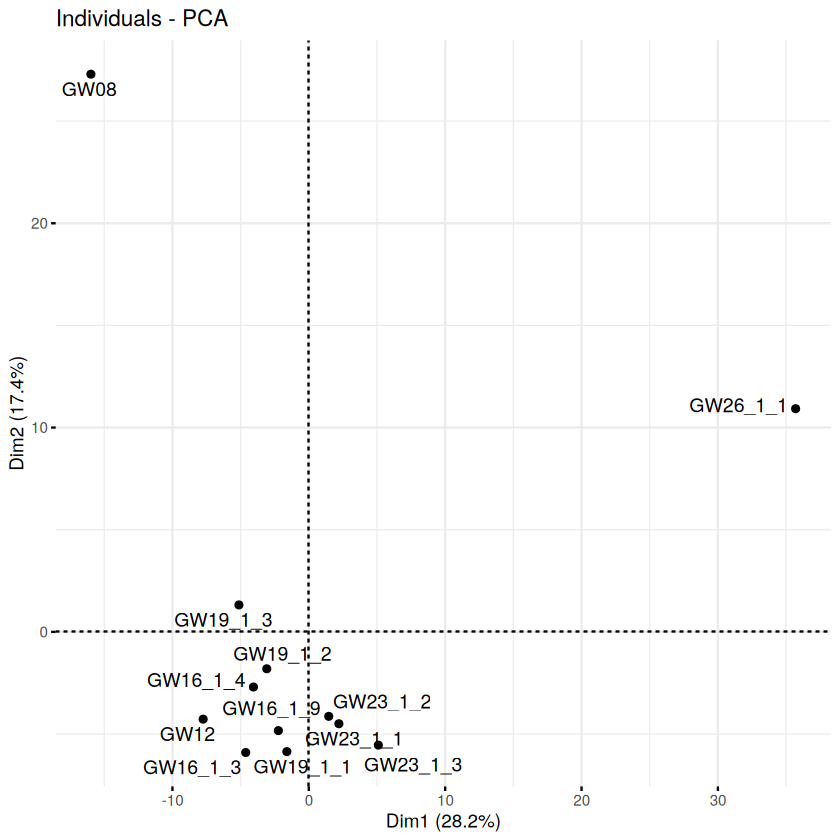

In [65]:
fviz_eig(pca, addlabels = TRUE)
fviz_pca_ind(pca, repel=TRUE)   
#fviz_pca_ind(pca, label='none', col.ind=data_t$psi_group, mean.point=F, addEllipses = T, legend.title="Groups")

In [90]:
above_threshold <- quantile(get_pca_var(pca)$cos2[,1],0.8)
above_threshold
range(get_pca_var(pca)$cos2[,1])
table(get_pca_var(pca)$cos2[,1] > above_threshold)

80% 
0.5860887

[1] 2.037524e-07 8.172995e-01


FALSE  TRUE 
  443   107 

In [93]:
top20percent_as_event_related2pc1 <- names(get_pca_var(pca)$cos2[,1][get_pca_var(pca)$cos2[,1] > above_threshold])
length(top20percent_as_event_related2pc1)

[1] 107

In [75]:
# 计算变量的贡献度平方(cos2)，这是变量在主成分上的解释方差
#get_pca_var(pca)
#取在第一个主成分上贡献度排名前十的as event
top20percent_as_event_related2pc1 <- names(get_pca_var(pca)$cos2[,1][get_pca_var(pca)$cos2[,1] > above_threshold])
top10_as_event_related2pc2 <- names(sort(get_pca_var(pca)$cos2[,2], decreasing = TRUE))[1:20]
top10_as_event_related2pc1_2 <- unique(c(top20_as_event_related2pc1,top20_as_event_related2pc1))
write.table(top10_as_event_related2pc1_2,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top10_as_event_related2pc1_2.txt",quote=F,col.names=F,row.names=F)
write.table(top10_as_event_related2pc1,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top10_as_event_related2pc1.txt",quote=F,col.names=F,row.names=F)
write.table(top10_as_event_related2pc1_2,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top10_as_event_related2pc2.txt",quote=F,col.names=F,row.names=F)
#top_vars

In [81]:
# 计算变量的贡献度平方(cos2)，这是变量在主成分上的解释方差
#get_pca_var(pca)
#取在第一个主成分上贡献度排名前十的as event
top20_as_event_related2pc1 <- names(sort(get_pca_var(pca)$cos2[,1], decreasing = TRUE))[1:20]
top100_as_event_related2pc1 <- names(sort(get_pca_var(pca)$cos2[,1], decreasing = TRUE))[1:100]
#top20_as_event_related2pc2 <- names(sort(get_pca_var(pca)$cos2[,2], decreasing = TRUE))[1:20]
#top20_as_event_related2pc1_2 <- unique(c(top20_as_event_related2pc1,top20_as_event_related2pc1))
#write.table(top20_as_event_related2pc1_2,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top20_as_event_related2pc1_2.txt",quote=F,col.names=F,row.names=F)
#write.table(top20_as_event_related2pc1,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top20_as_event_related2pc1.txt",quote=F,col.names=F,row.names=F)
#write.table(top20_as_event_related2pc1_2,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top20_as_event_related2pc2.txt",quote=F,col.names=F,row.names=F)
#top_vars

In [71]:
cumulative_cos2 <- apply(get_pca_var(pca)$cos2[, 1:2], 1, sum) # 计算前两个主成分的累积cos2

# 对累积cos2值进行降序排序并获取排名前十的变量索引
top_vars <- head(order(cumulative_cos2, decreasing = TRUE), 10)
rownames(get_pca_var(pca)$cos2)[top_vars]

[1] "ENSG00000117020.19;SE:chr1:243664883-243695591:243695716-243843125:-"                                 
 [2] "ENSG00000166272.18;AF:chr10:102743982:102744143-102797993:102776249:102776417-102797993:+"            
 [3] "ENSG00000186487.20;AF:chr2:2284503-2326036:2326554:2284503-2330967:2331348:-"                         
 [4] "ENSG00000158864.13;SE:chr1:161206597-161208005:161208127-161209193:+"                                 
 [5] "ENSG00000078328.22;MX:chr16:6654650-6876662:6876743-7052057:6654650-6983639:6983738-7052057:+"        
 [6] "ENSG00000100325.15;MX:chr22:29832342-29833541:29833614-29838178:29832342-29834442:29834550-29838178:-"
 [7] "ENSG00000100325.15;MX:chr22:29832342-29833541:29833614-29838178:29832342-29834489:29834550-29838178:-"
 [8] "ENSG00000100325.15;MX:chr22:29832342-29833541:29833614-29838178:29832342-29836438:29836500-29838178:-"
 [9] "ENSG00000114861.23;MX:chr3:71359244-71493426:71493555-71583571:71359244-71581549:71581697-71583571:-" 
[10] "ENSG00000250120.8;A5:chr5:140858436-140978949:140857647-140978949:+"

In [ ]:
# 根据分组上色并绘制95%置信区间
#fviz_pca_ind(pca, col.ind=data_t$conditions, mean.point=F, addEllipses = T, legend.title="Groups", ellipse.type="confidence", ellipse.level=0.95)
# Visualize variable with cos2 >= 0.99
#fviz_pca_var(pca, select.var = list(cos2 = above_cor), repel=T, col.var = "cos2", geom.var = c("arrow", "text") )
#fviz_pca_var(pca, select.var= list(cos2 = 10), repel=T, col.var = "contrib")

In [100]:
data_res_bar <- data.frame(categories = names(table(uniq_input_data[top20percent_as_event_related2pc1,16])), values = table(uniq_input_data[top20percent_as_event_related2pc1,16]))
colnames(data_res_bar) <- c('categories','group','values')
data_psi_bar <- data.frame(categories = names(table(uniq_input_data[top20percent_as_event_related2pc1,17])), values = table(uniq_input_data[top20percent_as_event_related2pc1,17]))
colnames(data_psi_bar) <- c('categories','group','values')
data_psi_bar$categories <- factor(data_psi_bar$categories, levels = c('psi_up','psi_down','psi_stable','psi_no_change'))


In [98]:
data_psi_bar

categories,group,values
<chr>,<fct>,<int>
psi_down,psi_down,2
psi_no_change,psi_no_change,2
psi_stable,psi_stable,10
psi_up,psi_up,93


In [121]:
colors=c("#840dd3","#04c49c","#2759bd","#FFB400")
# 绘制饼图
psi_bar <- ggplot(data_psi_bar, aes(x = "", y = values, fill = categories)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  geom_text(aes(label =values), 
            position = position_stack(vjust = 0.5), size = 4) +
  scale_fill_manual(values = colors)+
  theme(text = element_text(size = 13)) 
res_bar <- ggplot(data_res_bar, aes(x = "", y = values, fill = categories)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  theme_void() +
  geom_text(aes(label =values),size = 4) +
  scale_fill_manual(values = colors[1])+
  theme(text = element_text(size = 13)) 

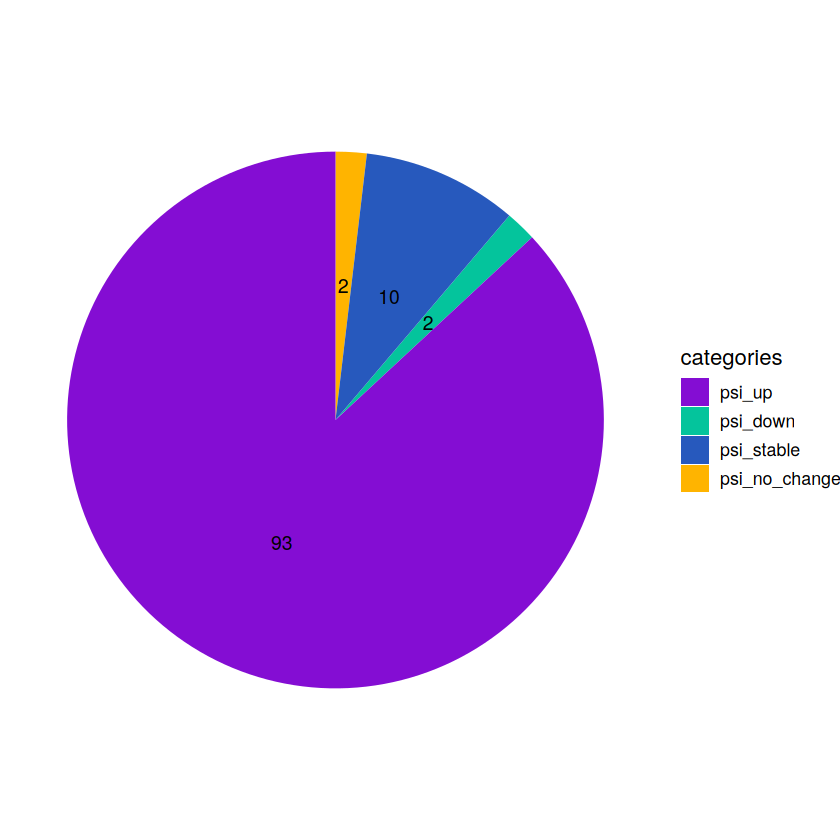

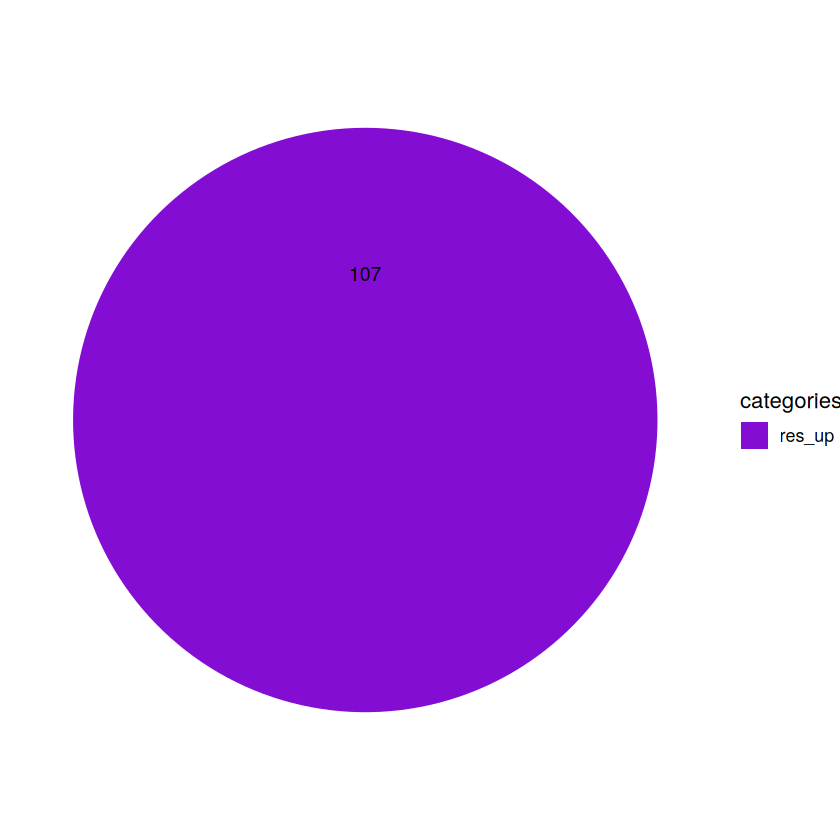

In [123]:
psi_bar
res_bar

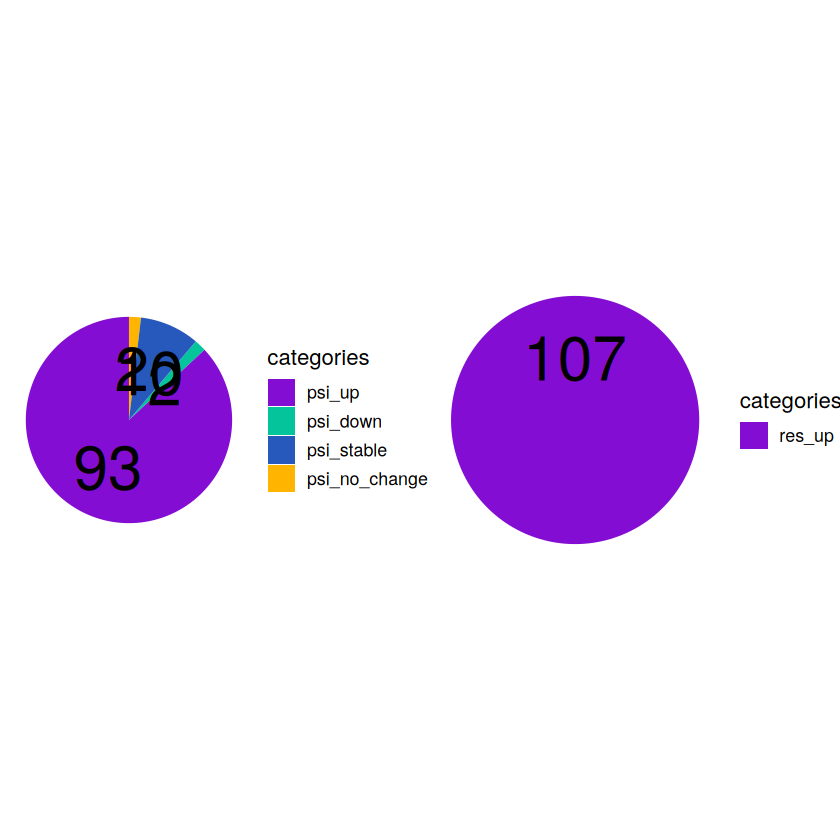

In [114]:

fig1 <- ggpubr::ggarrange(plotlist = list(psi_bar, res_bar), ncol = 2, nrow = 1)
fig1

ggsave('/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/editing_level_change/notwith1/cor_threshold_0.3/top20_as_events_psi_res_change.png',fig1,width = 15,height = 6)